## Using Word2Vec to investigate relationships between words.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

Our dataset is the **"Coronavirus tweets NLP dataset"** composed of tweets made during the coronavirus pandemic.

In [2]:
dataset = pd.read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv', encoding='latin1')

In [3]:
import re
texts=[]
for i in range(0,len(dataset)):
  text = re.sub('[^a-zA-Z]' , ' ', dataset['OriginalTweet'][i])
  text = text.lower()
  text = text.split()
  x = len(text) if text.count('https') ==0  else text.index('https')
  text = text[: x ]
  text = [t for t in text if not t=='https']
  text = ' '.join(text)
  texts.append(text)

In [4]:
sentences = [line.split() for line in texts]

w2v =Word2Vec(sentences, vector_size=100, window=5, workers=4, epochs =10, min_count=5)

In [5]:
# Accessing the vocabulary
vocab = w2v.wv.key_to_index  # This contains the words as keys and their frequency ranks as values

# If you also want frequency counts, use this
freqs = w2v.wv.index_to_key  # List of words sorted by frequency (most frequent first)

# Display the most common words
print("Most common words in the model:")
for word in freqs[:10]:  # Top 10 most frequent words
    print(word)

Most common words in the model:
the
to
covid
and
of
in
a
i
coronavirus
food


In [6]:
print(w2v.wv.most_similar('india'))

[('trade', 0.9928045272827148), ('novel', 0.9925623536109924), ('coronavirusindia', 0.9923738837242126), ('netflix', 0.992132306098938), ('mohfw', 0.9906868934631348), ('infrastructure', 0.990494966506958), ('update', 0.9897258281707764), ('foxnews', 0.9896149039268494), ('nike', 0.9891589283943176), ('response', 0.9889547824859619)]


In [7]:
w2v.wv.most_similar('iran', topn = 5)

[('thanksgiving', 0.9816372394561768),
 ('german', 0.9816110730171204),
 ('solutions', 0.9815852642059326),
 ('fed', 0.981453537940979),
 ('f', 0.9806697368621826)]

In [8]:
w2v.wv.most_similar('human', topn = 5)

[('act', 0.9926345348358154),
 ('benefits', 0.9886161684989929),
 ('uncertain', 0.9885950088500977),
 ('coverage', 0.9882590174674988),
 ('term', 0.9882357716560364)]

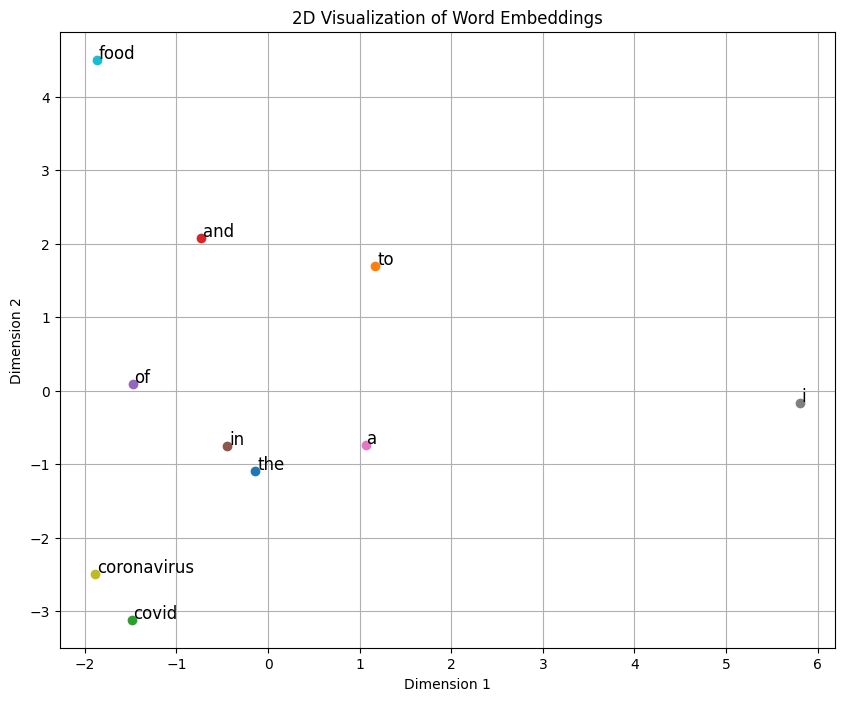

In [9]:
# Step 1: Extract the embeddings for the most frequent words
most_frequent_words = w2v.wv.index_to_key[:10]  # Top 10 most frequent words
embeddings = [w2v.wv[word] for word in most_frequent_words]

# Step 2: Reduce dimensionality (PCA or t-SNE)
# Option 1: Using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Option 2: Using t-SNE (uncomment the below if you prefer t-SNE)
# tsne = TSNE(n_components=2, random_state=42, perplexity=3)
# reduced_embeddings = tsne.fit_transform(embeddings)

# Step 3: Plot the embeddings
plt.figure(figsize=(10, 8))
for i, word in enumerate(most_frequent_words):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y, marker='o')
    plt.text(x + 0.02, y + 0.02, word, fontsize=12)

plt.title("2D Visualization of Word Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()

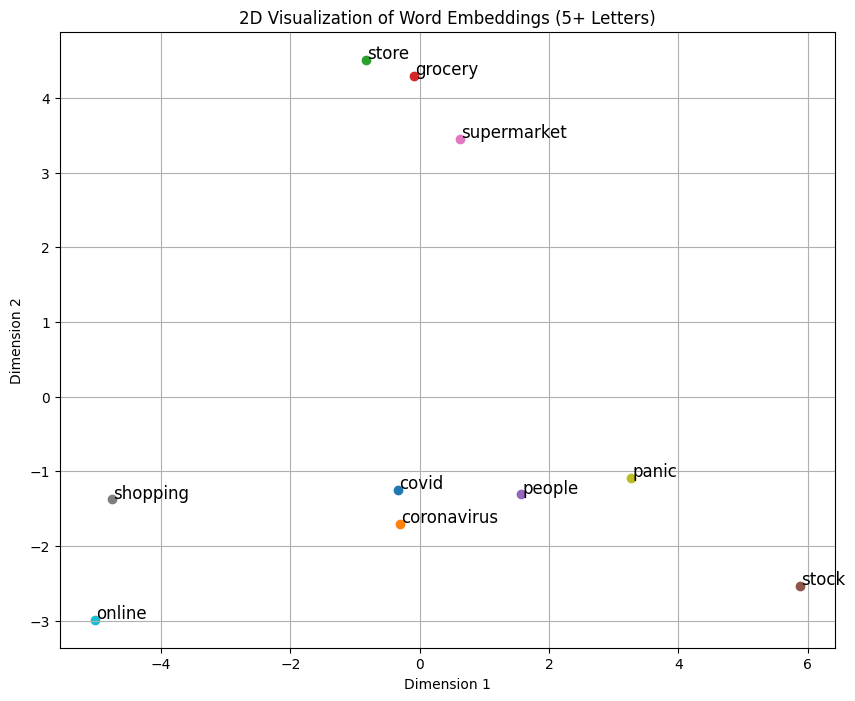

In [10]:
# Step 1: Filter most frequent words with at least 5 letters
filtered_words = [word for word in w2v.wv.index_to_key if len(word) >= 5][:10]  # Top 10 words with 4+ letters
embeddings = [w2v.wv[word] for word in filtered_words]

# Step 2: Reduce dimensionality (PCA or t-SNE)
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Step 3: Plot the embeddings
plt.figure(figsize=(10, 8))
for i, word in enumerate(filtered_words):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y, marker='o')
    plt.text(x + 0.02, y + 0.02, word, fontsize=12)

plt.title("2D Visualization of Word Embeddings (5+ Letters)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()


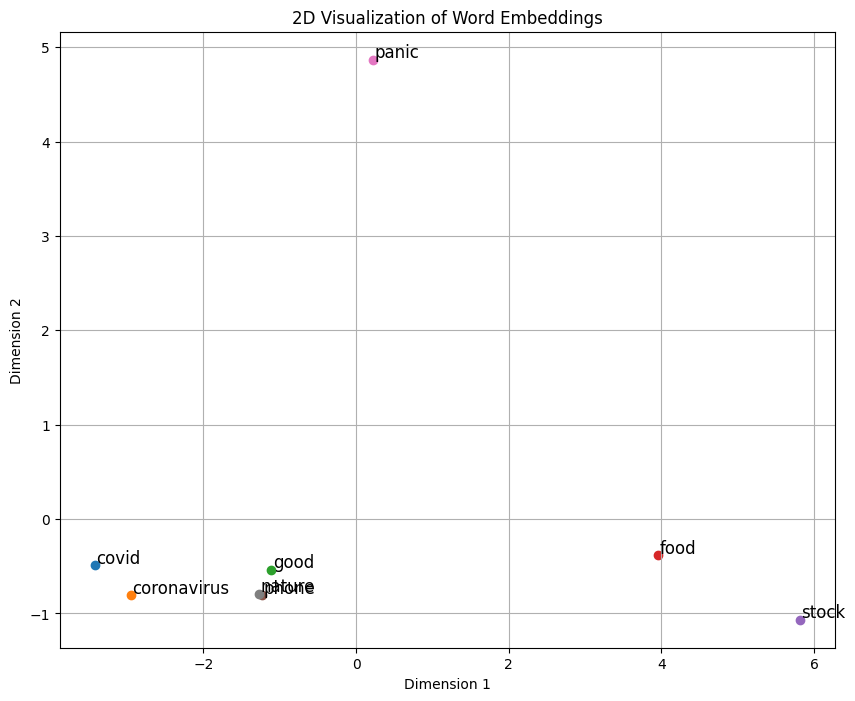

In [11]:
filtered_words = ['covid', 'coronavirus', 'good', 'food', 'stock', 'phone', 'panic', 'nature']


embeddings = [w2v.wv[word] for word in filtered_words]

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)


plt.figure(figsize=(10, 8))
for i, word in enumerate(filtered_words):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y, marker='o')
    plt.text(x + 0.02, y + 0.02, word, fontsize=12)

plt.title("2D Visualization of Word Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()

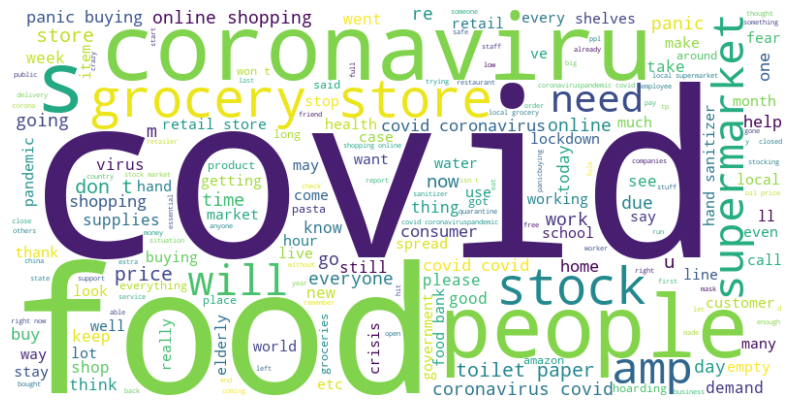

In [12]:
from wordcloud import WordCloud

text = " ".join([" ".join(sentence) for sentence in sentences])  # Combine all text into one string
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

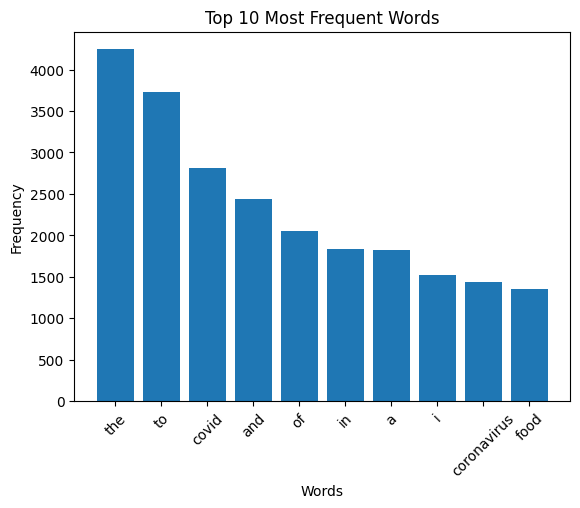

In [13]:
from collections import Counter
import matplotlib.pyplot as plt

word_counts = Counter(word for sentence in sentences for word in sentence)
most_common = word_counts.most_common(10)  # Top 10 words

words, counts = zip(*most_common)
plt.bar(words, counts)
plt.title("Top 10 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

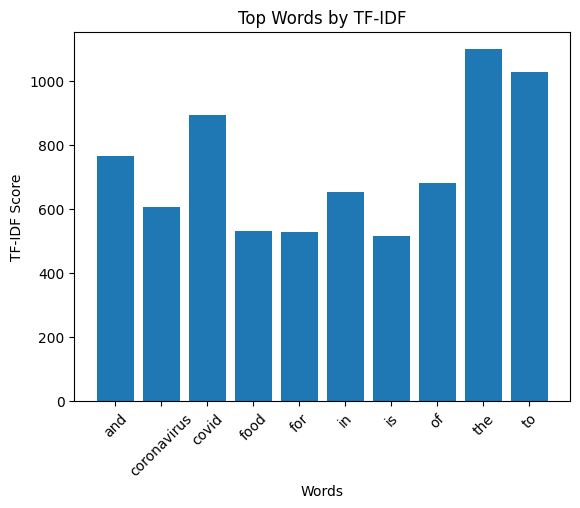

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt

text_data = [" ".join(sentence) for sentence in sentences]
vectorizer = TfidfVectorizer(max_features=10)
X = vectorizer.fit_transform(text_data)

words = vectorizer.get_feature_names_out()
scores = np.asarray(X.sum(axis=0)).flatten()

plt.bar(words, scores)
plt.title("Top Words by TF-IDF")
plt.xlabel("Words")
plt.ylabel("TF-IDF Score")
plt.xticks(rotation=45)
plt.show()

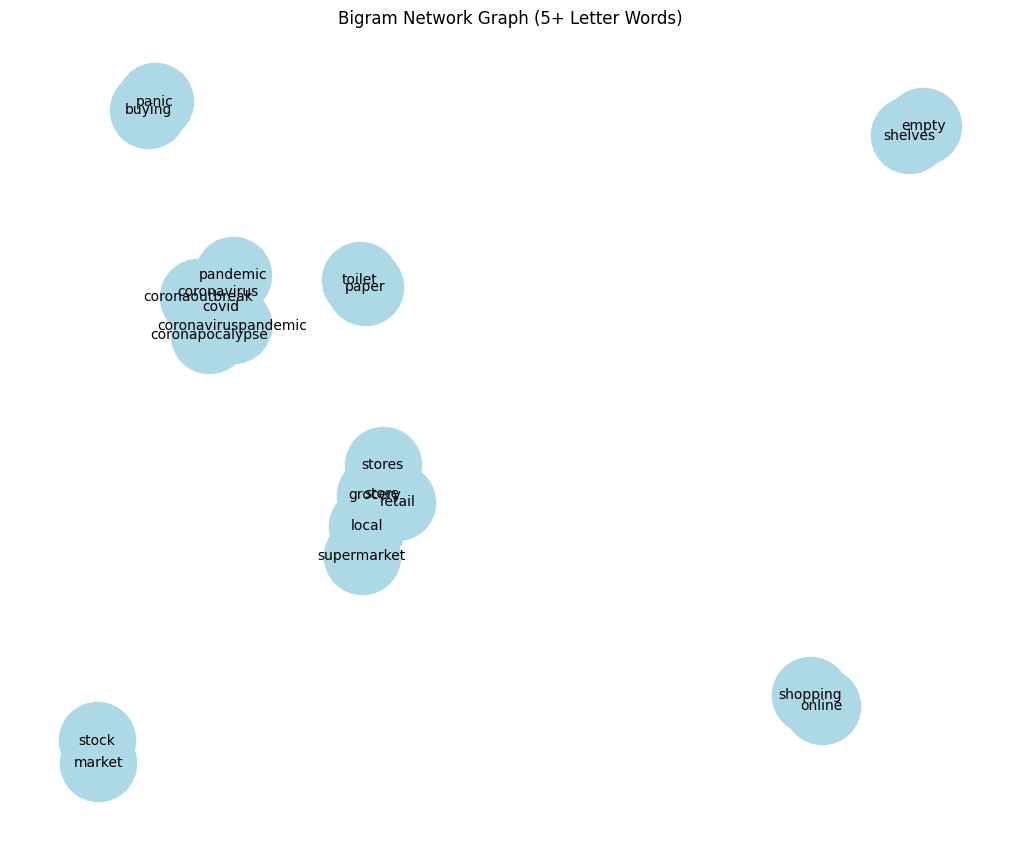

In [15]:
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

# Generate bigrams (only include words with 5+ letters)
filtered_bigrams = [
    (sentence[i], sentence[i + 1])
    for sentence in sentences
    for i in range(len(sentence) - 1)
    if len(sentence[i]) >= 5 and len(sentence[i + 1]) >= 5
]

# Count the most common bigrams
bigram_counts = Counter(filtered_bigrams).most_common(20)  # Top 20 bigrams

# Create the network graph
G = nx.Graph()
for (word1, word2), count in bigram_counts:
    G.add_edge(word1, word2, weight=count)

# Plot the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10)
plt.title("Bigram Network Graph (5+ Letter Words)")
plt.show()


In [16]:
from gensim.models import LdaModel
from gensim.corpora.dictionary import Dictionary
import pyLDAvis.gensim_models
import pyLDAvis

# Filter sentences to include only words with 5+ letters
filtered_sentences = [[word for word in sentence if len(word) >= 5] for sentence in sentences]

# Prepare the dictionary and corpus
dictionary = Dictionary(filtered_sentences)
corpus = [dictionary.doc2bow(sentence) for sentence in filtered_sentences]

# Train LDA model
lda = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Visualize topics
pyLDAvis.enable_notebook()
lda_vis = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary)
pyLDAvis.display(lda_vis)


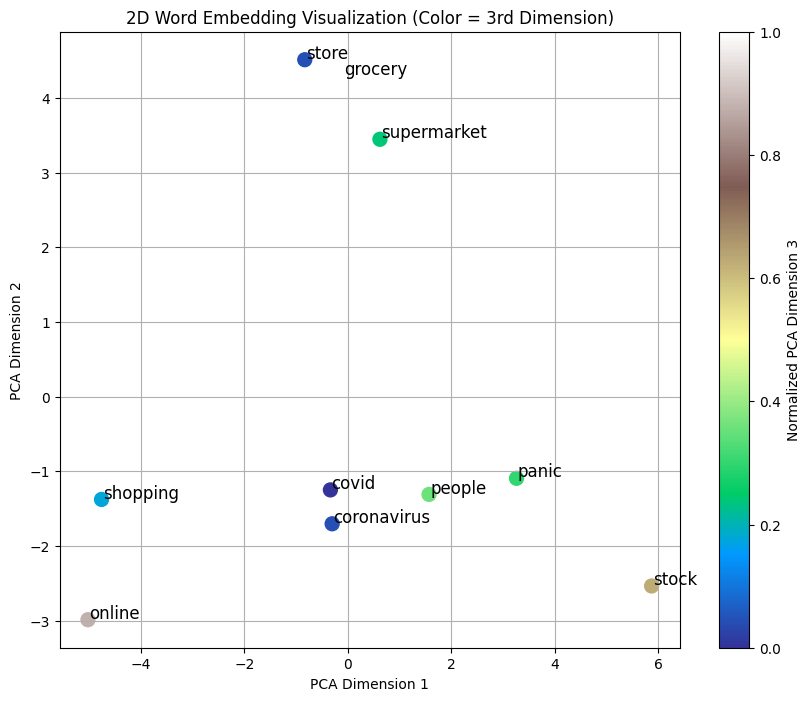

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Step 1: Extract the embeddings for the most frequent words with 5+ letters
filtered_words = [word for word in w2v.wv.index_to_key if len(word) >= 5][:10]
embeddings = [w2v.wv[word] for word in filtered_words]

# Step 2: Reduce dimensionality to 3D with PCA
pca = PCA(n_components=3)
reduced_embeddings = pca.fit_transform(embeddings)

# Step 3: Use the first two components for X and Y, and the third for color
x_coords = reduced_embeddings[:, 0]
y_coords = reduced_embeddings[:, 1]
z_coords = reduced_embeddings[:, 2]  # Third dimension

# Normalize the third dimension for color mapping
normalized_z = (z_coords - min(z_coords)) / (max(z_coords) - min(z_coords))

# Step 4: Create the scatterplot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    x_coords, 
    y_coords, 
    c=normalized_z, 
    cmap="terrain",  # Terrain-like colormap
    s=100
)

# Add labels for each word
for i, word in enumerate(filtered_words):
    plt.text(x_coords[i] + 0.02, y_coords[i] + 0.02, word, fontsize=12)

# Add colorbar to represent the third dimension
colorbar = plt.colorbar(scatter)
colorbar.set_label("Normalized PCA Dimension 3")

plt.title("2D Word Embedding Visualization (Color = 3rd Dimension)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.grid(True)
plt.show()
